In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
series = np.sin(0.1 * np.arange(200)) # + np.random.randnd(200) * 0.1

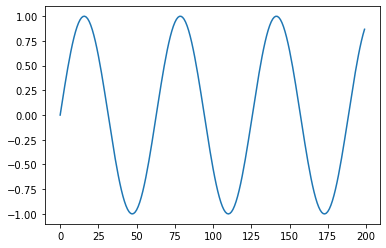

In [4]:
plt.plot(series)

### Build a dataset

In [5]:
T = 10
X = []
Y = []

In [6]:
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [7]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [8]:
# linear model
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.1))

C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
# train the model
# X:학습데이터, Y:정답데이터, epochs=80, validation_data: 검증 데이터
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 41ms/step - loss: 0.4999 - val_loss: 0.5689
Epoch 2/80
3/3 [==============================] - 0s 10ms/step - loss: 0.3866 - val_loss: 0.1911
Epoch 3/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1409 - val_loss: 0.1414
Epoch 4/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1323 - val_loss: 0.0156
Epoch 5/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0253 - val_loss: 0.0558
Epoch 6/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0864 - val_loss: 0.0267
Epoch 7/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0222 - val_loss: 0.0528
Epoch 8/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0504 - val_loss: 0.0261
Epoch 9/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0228 - val_loss: 0.0306
Epoch 10/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0327 - val_loss: 0.0211
Epoch 11/80
3/3 [============

Epoch 80/80
3/3 [==============================] - 0s 9ms/step - loss: 5.4455e-12 - val_loss: 3.3155e-12


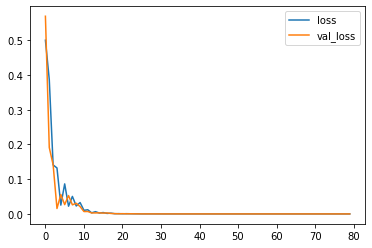

In [11]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### "Wrong" forecast using true targets

In [12]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1
    
    validation_predictions.append(p)

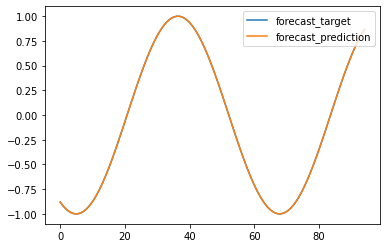

In [13]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_prediction')
plt.legend()

In [14]:
validation_target = Y[-N//2:]
validation_predictions = []

# last tarin input
last_x = X[-N//2]

In [15]:
print(len(validation_target))
print(last_x)

95
[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]


In [16]:
print(last_x.reshape(1,-1))

[[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
  -0.62507065 -0.69987469 -0.76768581 -0.82782647]]


In [17]:
print(model.predict(last_x.reshape(1, -1))[0,0])

-0.8796957


In [18]:
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

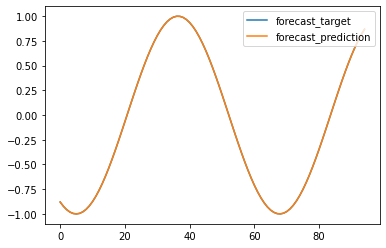

In [19]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_prediction')
plt.legend()

### Noise examples

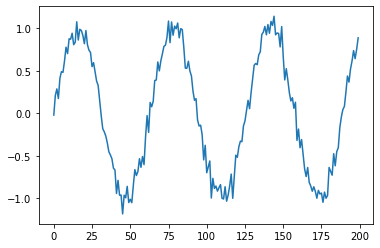

In [23]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

In [25]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [26]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [27]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse', optimizer = Adam(lr=0.1))

C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 51ms/step - loss: 0.3951 - val_loss: 0.1870
Epoch 2/80
3/3 [==============================] - 0s 20ms/step - loss: 0.1264 - val_loss: 0.0815
Epoch 3/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0600 - val_loss: 0.0548
Epoch 4/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0589 - val_loss: 0.0509
Epoch 5/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0529 - val_loss: 0.0898
Epoch 6/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0646 - val_loss: 0.0609
Epoch 7/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0475 - val_loss: 0.0378
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0273 - val_loss: 0.0285
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0201 - val_loss: 0.0244
Epoch 10/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0246 - val_loss: 0.0323
Epoch 11/80
3/3 [============

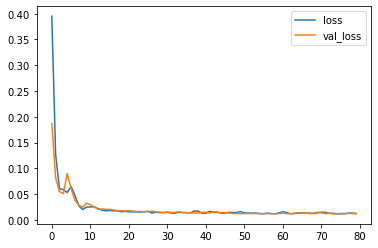

In [29]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [30]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0]
    i += 1
    
    validation_predictions.append(p)

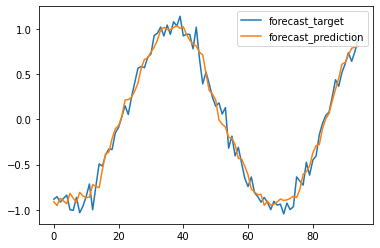

In [31]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_prediction')
plt.legend()

In [32]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

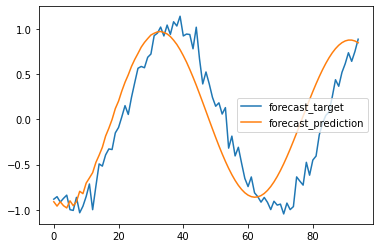

In [33]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_prediction')
plt.legend()

In [34]:
print(last_x)

[0.68105412 0.73576629 0.78223044 0.81995964 0.84853727 0.86767638
 0.87719637 0.8770119  0.86716765 0.84780943]
